In [8]:
import numpy as np 
import pandas as pd
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import linear_model, datasets
from sklearn.linear_model import RandomizedLogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
#main_df=pd.read_csv("creditcard.csv")
main_df=pd.read_csv("F:\creditcard.csv")
main_df.head()
feature_size = len(main_df.columns)
class_index = feature_size -1 

In [12]:
fraud_raw = main_df[main_df['Class'] == 1]
normal_raw = main_df[main_df['Class'] == 0]

# Undersample the normal transactions
percentage = len(fraud_raw)/float(len(normal_raw))
normal = normal_raw.sample(frac=percentage)
fraud = fraud_raw
cc_data = fraud.append(normal)

print ("Percentage of normal transactions                 :", len(normal) / float(len(cc_data)))
print ("Percentage of fraudulent trasactions                :", len(fraud_raw) / float(len(cc_data)))
print ("Total number of transactions in our new dataset :", len(cc_data))

Percentage of normal transactions                 : 0.5
Percentage of fraudulent trasactions                : 0.5
Total number of transactions in our new dataset : 984


In [13]:
reg_model = RandomForestClassifier(criterion='entropy',n_estimators=100)
train_data,test_data = train_test_split(cc_data,test_size=0.30)
train_matrix = train_data.as_matrix()
x = train_matrix[:,range(0,class_index-1)]
y=train_matrix[:,class_index]
reg_model = reg_model.fit(x,y)


In [14]:
test_matrix =test_data.as_matrix()
test_x = test_matrix[:,range(0,class_index-1)]
test_y=test_matrix[:,class_index]

In [15]:
predicted = reg_model.predict(test_x)

             precision    recall  f1-score   support

        0.0       0.90      0.99      0.94       154
        1.0       0.98      0.89      0.93       142

avg / total       0.94      0.94      0.94       296

[[152   2]
 [ 16 126]]
AUC = 0.9372


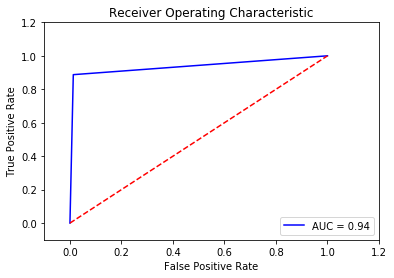

In [16]:
print(metrics.classification_report(test_y, predicted))
print(metrics.confusion_matrix(test_y, predicted))
false_positive_rate, true_positive_rate, thresholds = roc_curve(test_y, predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('AUC = %0.4f'% roc_auc)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()